<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM2/ML_Lab/MLLAB-Project/Assignment2/q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Soumya Mukherjee | CH24M571

In [50]:
!pip install imbalanced-learn

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
# different pipeline than scikit;s - will be used for SMOTE

In [6]:
# dataset = "./data/problem1/diabetes.csv"
# df = pd.read_csv(dataset)


In [7]:
dataset = "./diabetes.csv"
df = pd.read_csv(dataset)


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


The dataset for the assignment is in the file named ‘diabetes.csv’ and the main objective here is to predict if the patient is diabetic or not. For the data perform a train-test
split in ratio 70:30 and fit a decision tree classifier model with default parameters.

(a) Evaluate the accuracy of the model. [Marks:8]

(b) Visualize the decision tree. (You can explore the option of changing the ‘font size’
in the tree if the plot is not clear) [Marks:12]

(c) Optimize the performance of the decision tree by changing the parameters - criterion, max depth and min samples leaf. [Marks:10]

(d) Now check the accuracy of the model after optimization. Also display the confusion
matrix. [Marks:10]

In [11]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=12)


Doing stratification such that we have random distribution of diabetes in test and train sets

In [14]:
(X_train , X_test , y_test ,y_train)

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 483            0       84             82             31      125  38.2   
 215           12      151             70             40      271  41.8   
 346            1      139             46             19       83  28.7   
 692            2      121             70             32       95  39.1   
 577            2      118             80              0        0  42.9   
 ..           ...      ...            ...            ...      ...   ...   
 145            0      102             75             23        0   0.0   
 222            7      119              0              0        0  25.2   
 148            5      147             78              0        0  33.7   
 614           11      138             74             26      144  36.1   
 736            0      126             86             27      120  27.4   
 
      DiabetesPedigreeFunction  Age  
 483                     0.233   23  
 215                  

Visualizing the data before doing anything using histogram

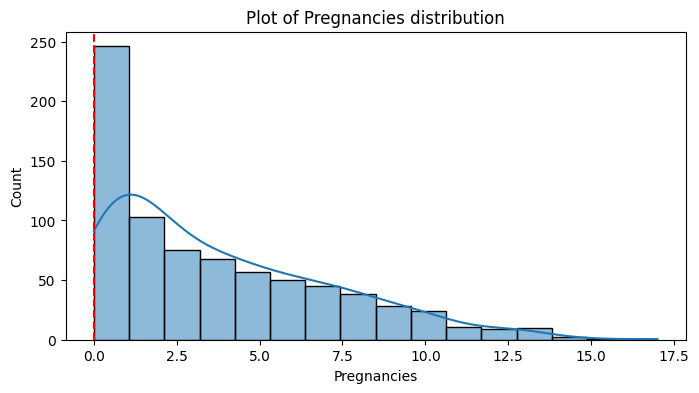

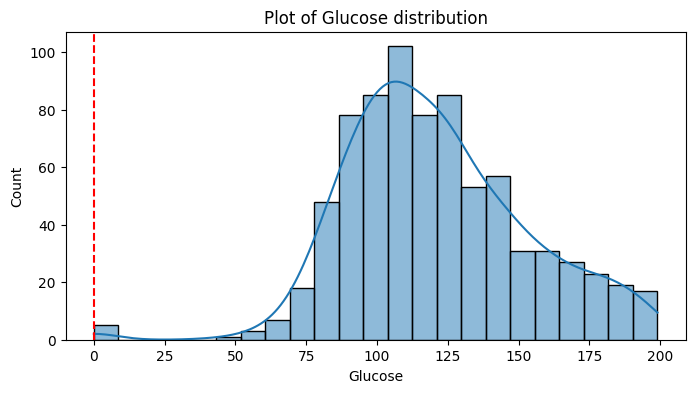

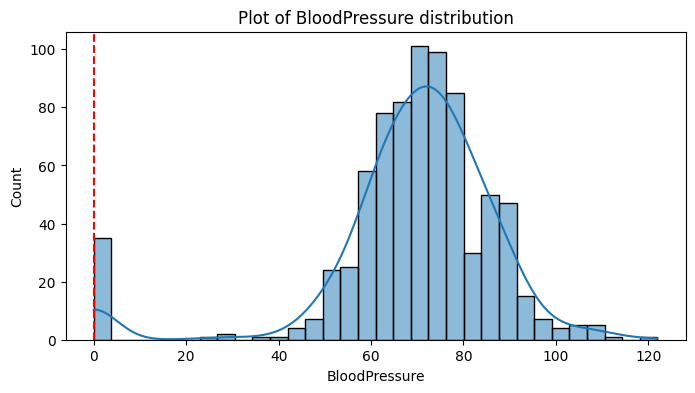

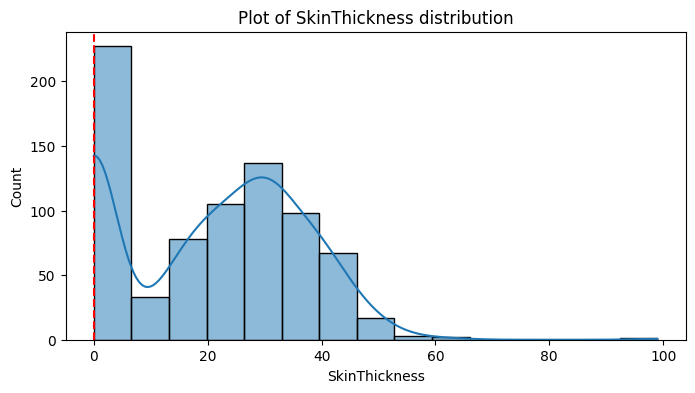

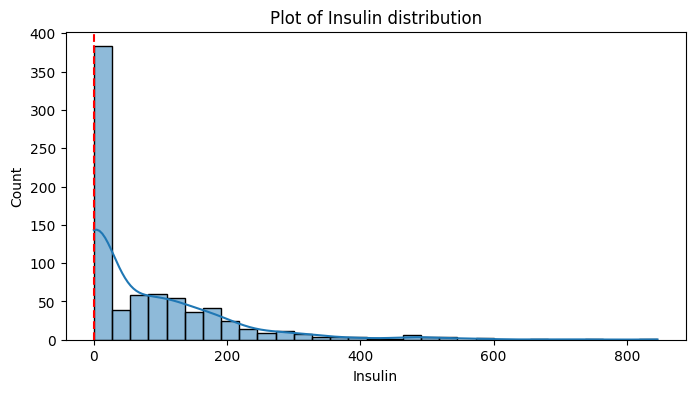

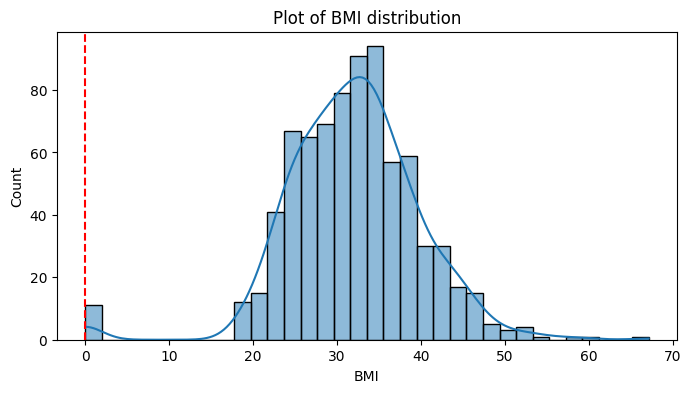

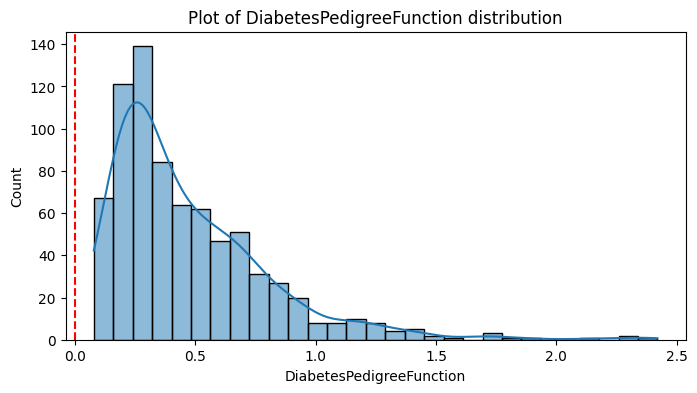

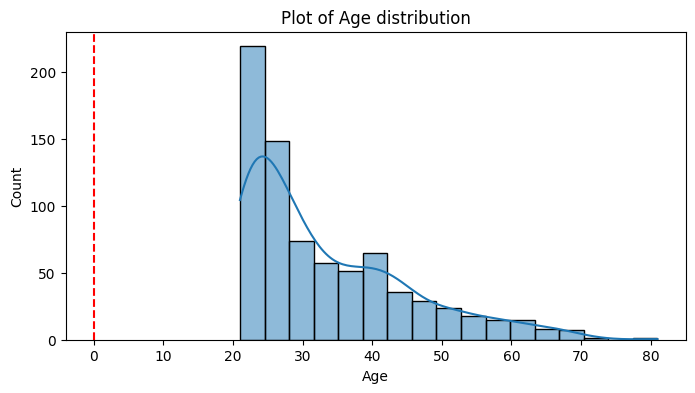

In [15]:
for cols in X.columns:
  plt.figure(figsize = (8,4))
  sns.histplot(df[cols],kde = True)
  plt.title(f'Plot of {cols} distribution')
  plt.axvline(x=0, color='r', linestyle='--')
  plt.show()

Calculating the median values using only training set and fit this on the test set

In [16]:
zero_counts = {}
imputable_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for column in imputable_columns:
    zero_count = (df[column] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100
    zero_counts[column] = (zero_count, zero_percentage)

# Display zero counts and percentages
print("Zero values in each column:")
for column, (count, percentage) in zero_counts.items():
    print(f"{column}: {count} zeros ({percentage:.2f}%)")

Zero values in each column:
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)


In [17]:
X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()

In [18]:
for cols in imputable_columns:
  median_val =  X_train.loc[X_train[cols]!=0, cols].median()  # calculating the median value where the values are not zero
  X_train_imputed.loc[X_train_imputed[cols]==0,cols] = median_val
  X_test_imputed.loc[X_test_imputed[cols]==0,cols] = median_val

  print(f"Column: {cols}, Non-zero median: {median_val}")

Column: Glucose, Non-zero median: 117.0
Column: BloodPressure, Non-zero median: 72.0
Column: SkinThickness, Non-zero median: 30.0
Column: Insulin, Non-zero median: 130.0


In [19]:
X_imputed = pd.concat([X_train_imputed, X_test_imputed])
print("\nBefore imputation statistics:")
print(df[imputable_columns].describe())

print("\nAfter imputation statistics:")
print(X_imputed[imputable_columns].describe())


Before imputation statistics:
          Glucose  BloodPressure  SkinThickness     Insulin
count  768.000000     768.000000     768.000000  768.000000
mean   120.894531      69.105469      20.536458   79.799479
std     31.972618      19.355807      15.952218  115.244002
min      0.000000       0.000000       0.000000    0.000000
25%     99.000000      62.000000       0.000000    0.000000
50%    117.000000      72.000000      23.000000   30.500000
75%    140.250000      80.000000      32.000000  127.250000
max    199.000000     122.000000      99.000000  846.000000

After imputation statistics:
          Glucose  BloodPressure  SkinThickness     Insulin
count  768.000000     768.000000     768.000000  768.000000
mean   121.656250      72.386719      29.403646  143.106771
std     30.438286      12.096642       8.799436   85.975977
min     44.000000      24.000000       7.000000   14.000000
25%     99.750000      64.000000      25.000000  121.500000
50%    117.000000      72.000000      3

In [20]:
dtclf =  DecisionTreeClassifier(random_state =12)
n_tree = dtclf.fit(X_train_imputed,y_train)

y_predicted = dtclf.predict(X_test_imputed)

y_predicted

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [28]:
X_imputed.shape , X_train_imputed.shape , X_test_imputed.shape ,y_train.shape , y_test.shape ,y_predicted.shape

((768, 8), (537, 8), (231, 8), (537,), (231,), (231,))

Testing the values of the stock decision tree

In [34]:
train_accuracy = accuracy_score(y_train, dtclf.predict(X_train_imputed))
test_accuracy = accuracy_score(y_test, y_predicted)

print("---- Default Decision tree ----")
print(f"Training Accuracy: {train_accuracy*100}%")
print(f"Test Accuracy: {test_accuracy*100}%")


---- Default Decision tree ----
Training Accuracy: 100.0%
Test Accuracy: 77.05627705627705%


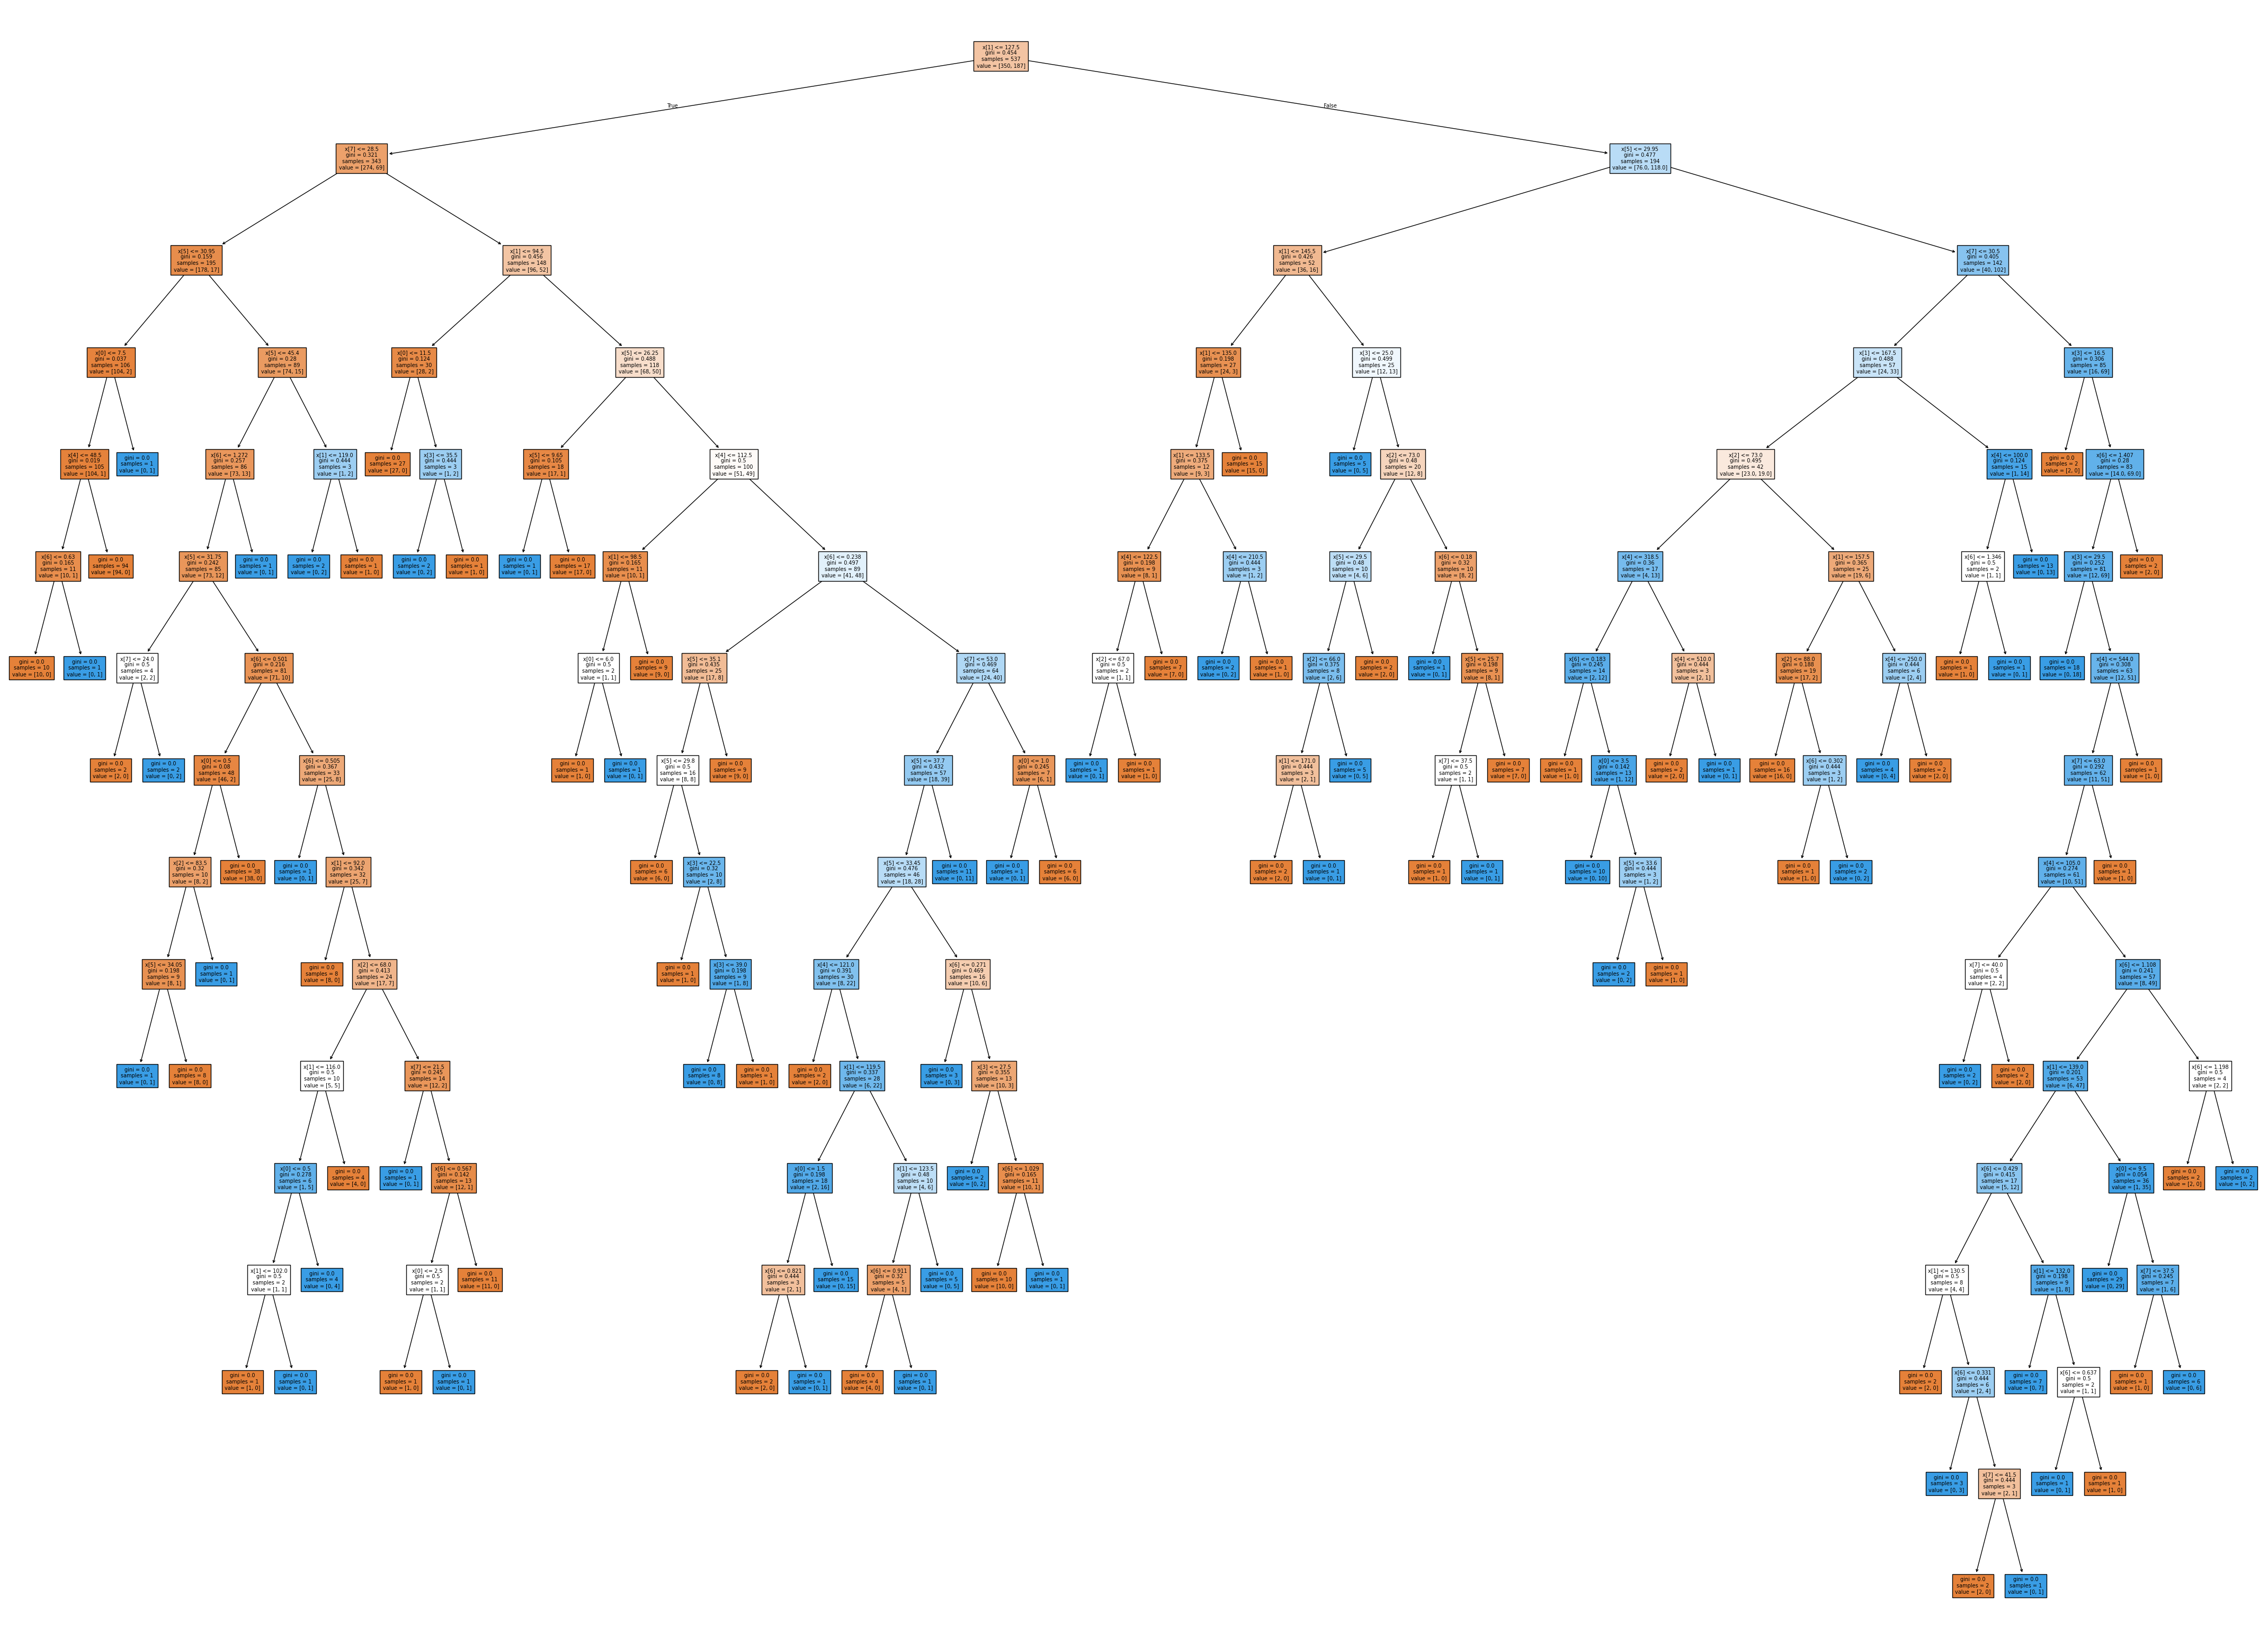

In [35]:
plt.figure(figsize=(55, 40))

tree.plot_tree(n_tree,filled = True,fontsize =7)

plt.show()

In [37]:
def generate_result(predictions, y_test, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot = True, cmap = 'Spectral', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()


The classification report for Normal Tree is:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       150
           1       0.67      0.68      0.67        81

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



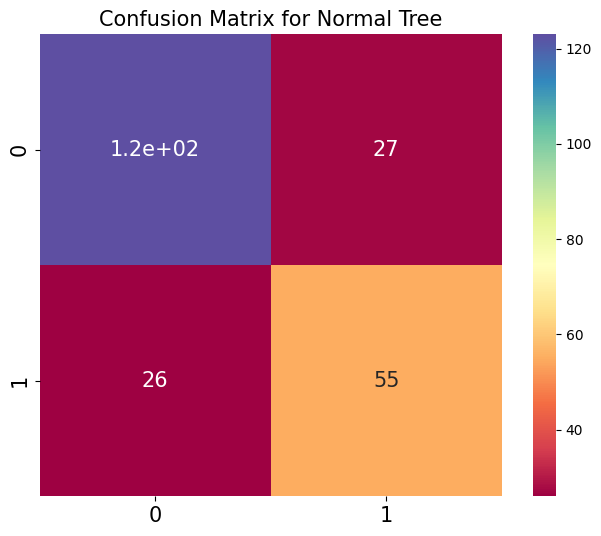

In [44]:
generate_result(y_predicted,y_test,"Normal Tree")

In [41]:
# Hyperparameter tuned tree

# going to use GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10, 20]
}

optimised_dt = DecisionTreeClassifier(random_state = 12)
grid_s = GridSearchCV(optimised_dt, param_grid, cv=5 , n_jobs = -1,scoring = 'accuracy' )
grid_s.fit(X_train_imputed, y_train)

print(f"Best Parameters from GridSearchCV is : {grid_s.best_params_}")


Best Parameters from GridSearchCV is : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}


In [42]:
best_dt = grid_s.best_estimator_
y_pred_gs = best_dt.predict(X_test_imputed)

In [43]:
optimized_accuracy = accuracy_score(y_test, y_pred_gs)
print("Optimized Accuracy while Using GridSearchCV:", optimized_accuracy)

Optimized Accuracy while Using GridSearchCV: 0.7922077922077922



The classification report for Optimised Tree is:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       150
           1       0.67      0.79      0.73        81

    accuracy                           0.79       231
   macro avg       0.77      0.79      0.78       231
weighted avg       0.80      0.79      0.80       231



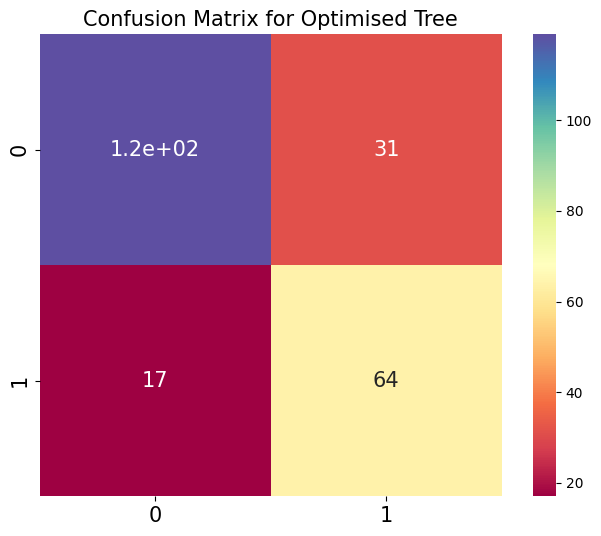

In [45]:
generate_result(y_pred_gs,y_test,"Optimised Tree")

In [47]:
print(f"Classification Report for optimised tree is : \n {classification_report(y_test, y_pred_gs)}")

Classification Report for optimised tree is : 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       150
           1       0.67      0.79      0.73        81

    accuracy                           0.79       231
   macro avg       0.77      0.79      0.78       231
weighted avg       0.80      0.79      0.80       231



Checking for class imbalances

In [49]:
# Counting values of diabetes and No diabetes in original dataset
class_counts = df['Outcome'].value_counts()
print("Class Distribution:\n", class_counts)


Class Distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64


Since there is a significant class imbalance we are going to do SMOTE ( Synthetic Minority over-sampling technique ) on the hyper parameter tuned decision tree model

In [64]:
pipeline = Pipeline([
     ('smote', SMOTE(random_state=12)),
     ('classifier', DecisionTreeClassifier(random_state=12))
 ])

In [65]:
# defining the parameters for using GridSearchCV
param_grid = {
     'smote__k_neighbors': [3, 5, 7],  # SMOTE parameter
     'classifier__criterion': ['gini', 'entropy'],
     'classifier__max_depth': [3, 5, 10, None],
     'classifier__min_samples_leaf': [1, 5, 10, 20]
 }

 # for reference : https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [66]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_imputed, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=12)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=12))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 10, None],
                         'classifier__min_samples_leaf': [1, 5, 10, 20],
                         'smote__k_neighbors': [3, 5, 7]},
             scoring='accuracy')

In [67]:
best_model = grid_search.best_estimator_

Accuracy after doing SMOTE: 0.7489177489177489

The classification report for Optimized Tree with SMOTE and GridSearchCV is:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       150
           1       0.61      0.78      0.68        81

    accuracy                           0.75       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.77      0.75      0.75       231



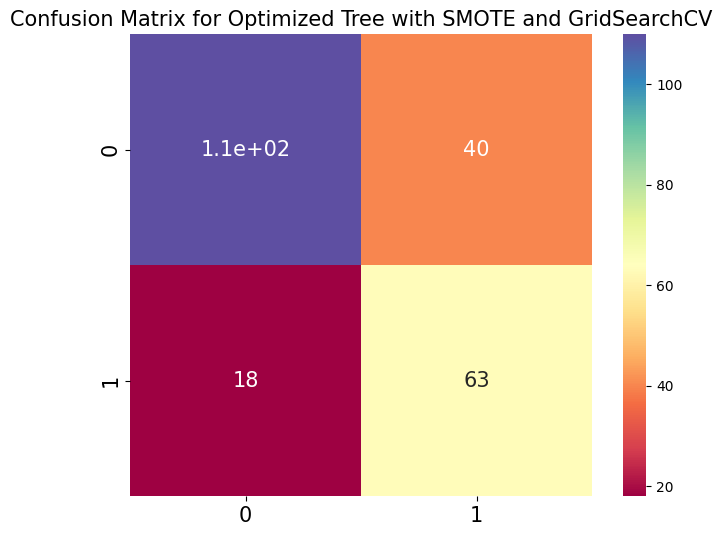

In [69]:
y_pred_smote = best_model.predict(X_test_imputed)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print("Accuracy after doing SMOTE:", accuracy_smote)

 # Generate confusion matrix and classification report
generate_result(y_pred_smote, y_test, "Optimized Tree with SMOTE and GridSearchCV")

In [72]:
print("---- Default Decision tree ----")
print(f"Test Accuracy: {test_accuracy*100}%")

print("\n---- Optimized Decision Tree (GridSearchCV) ----")
print("Optimized Accuracy while Using GridSearchCV:", optimized_accuracy)

print("\n---- Optimized Decision Tree with SMOTE and GridSearchCV ----")
print("Accuracy after doing SMOTE:", accuracy_smote)

print("\nClassification Report for Optimized Tree with SMOTE:\n", classification_report(y_test, y_pred_smote))


---- Default Decision tree ----
Test Accuracy: 77.05627705627705%

---- Optimized Decision Tree (GridSearchCV) ----
Optimized Accuracy while Using GridSearchCV: 0.7922077922077922

---- Optimized Decision Tree with SMOTE and GridSearchCV ----
Accuracy after doing SMOTE: 0.7489177489177489

Classification Report for Optimized Tree with SMOTE:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79       150
           1       0.61      0.78      0.68        81

    accuracy                           0.75       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.77      0.75      0.75       231

